In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# import data
df = pd.read_csv('quarterly_returns.csv')

df.dtypes

年份         int64
分组         int64
季度         int64
加权回报率    float64
月份        object
dtype: object

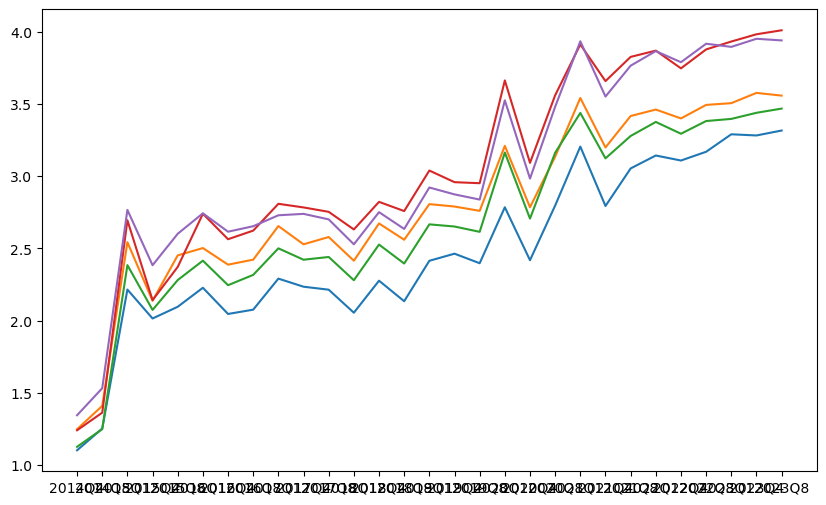

In [3]:

# 确保年份和季度的数据类型正确
df['年份'] = df['年份'].astype(str)
df['季度'] = df['季度'].astype(str)

# 创建一个新列'Year_Quarter'来合并年份和季度，并确保按照正确的时间顺序排序
df['Year_Quarter'] = df['年份'] + 'Q' + df['季度']

# 计算每个分组的加权回报率累计和，并将累积回报率的初始值设为1
df['Cumulative_Return'] = df.groupby('分组')['加权回报率'].cumsum() + 1

# 对数据进行排序，确保图形的横轴按照年份和季度的顺序排列
df.sort_values(by=['Year_Quarter'], inplace=True)

# 筛选出2014年第四季度及之后的数据
df = df[df['Year_Quarter'] >= '2014Q4']

# 获取分组列表
groups = df['分组'].unique()

# 绘制每个分组的累计回报率折线图
plt.figure(figsize=(10, 6))

for group in groups:
    group_data = df[df['分组'] == group]
    plt.plot(group_data['Year_Quarter'], group_data['Cumulative_Return'], label=group)


/tmp/ipykernel_3791/2109369932.py:2: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(bottom=1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


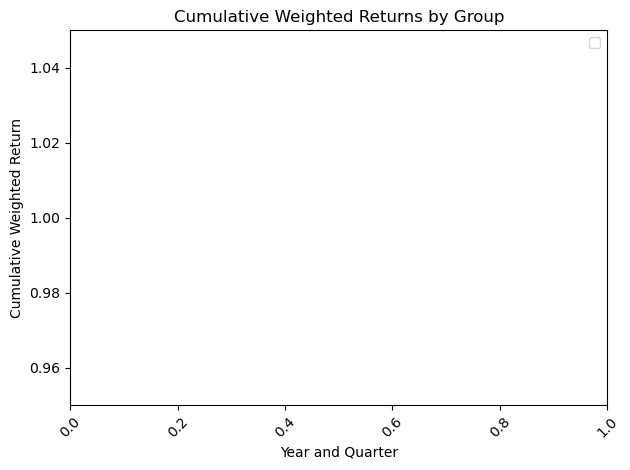

In [4]:

# 设置y轴起始值为1
plt.ylim(bottom=1)

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Cumulative Weighted Returns by Group')
plt.xlabel('Year and Quarter')
plt.ylabel('Cumulative Weighted Return')

# 旋转x轴标签，以便它们更容易阅读
plt.xticks(rotation=45)

# 显示图形
plt.tight_layout()
plt.show()